<a href="https://colab.research.google.com/github/pelin52/.com/blob/main/iris_veriseti_ile_lojistik_regrasyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"pelinen","key":"d8bf1f4896e0be47752b064f56972e06"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d uciml/iris


Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
iris.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("iris.zip","r") as zip_ref:
    zip_ref.extractall("iris_data")


In [ ]:
import pandas as pd

df = pd.read_csv("iris_data/Iris.csv")
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
df.describe()  # Sayısal sütunların istatistikleri
df['Species'].value_counts()  # Her türden kaç tane var


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


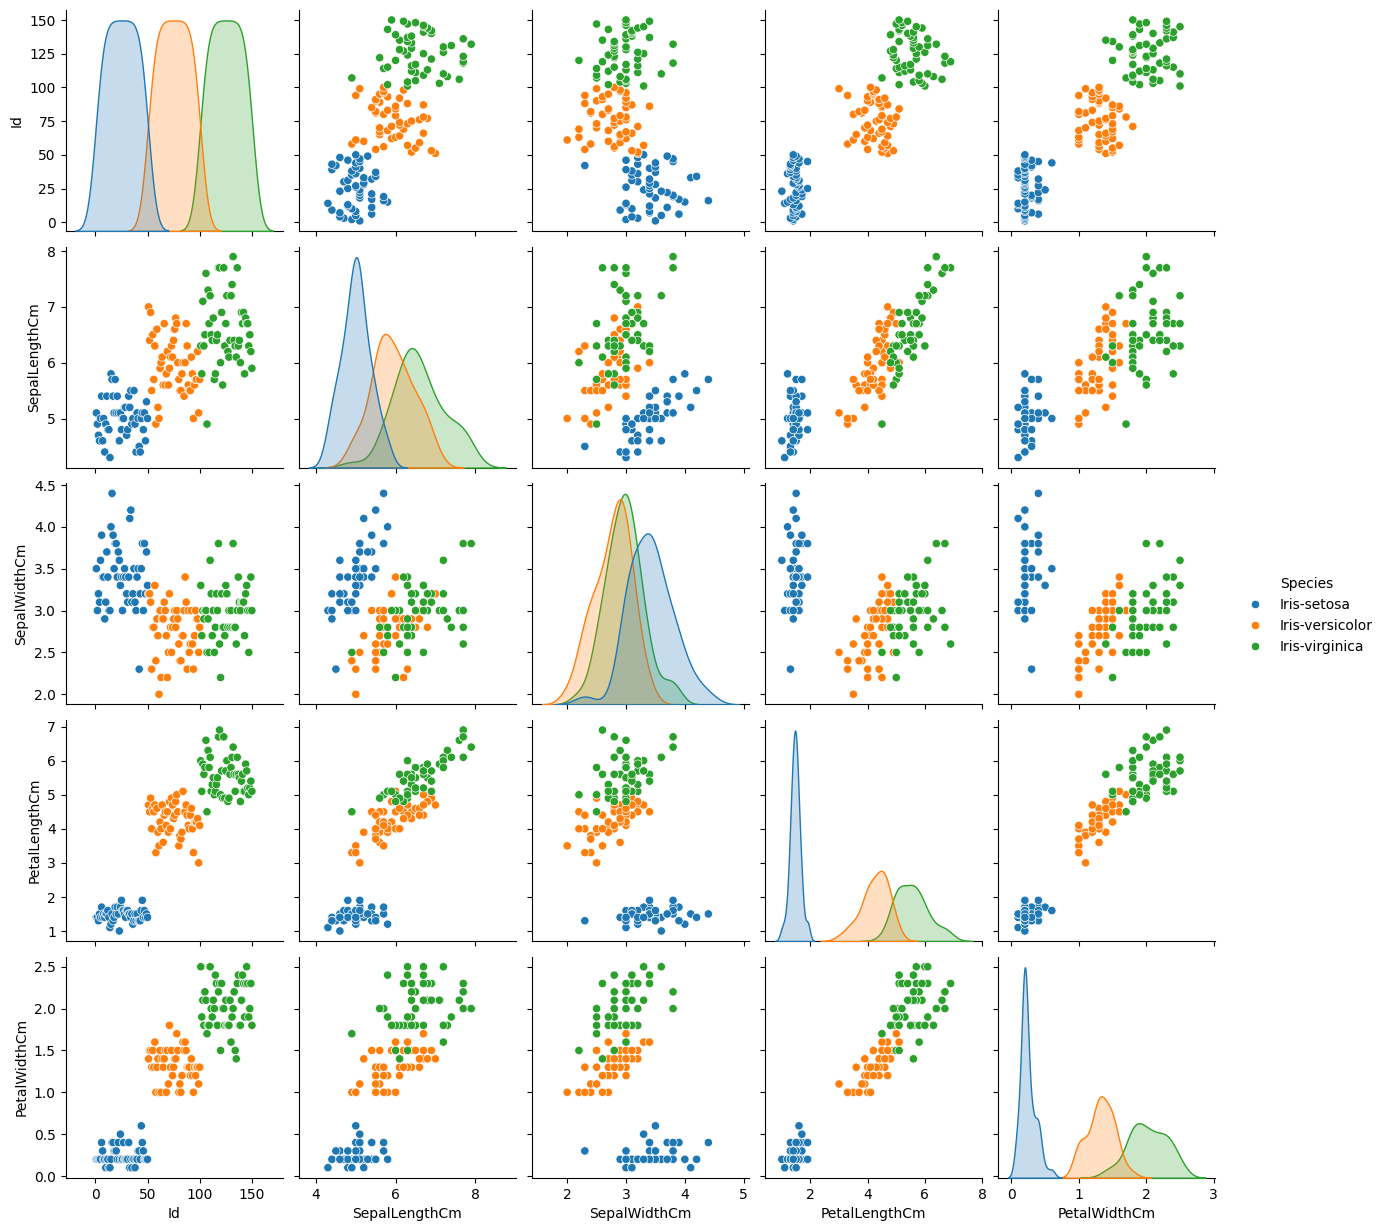

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Species')
plt.show()

In [ ]:
# 1️⃣ Gerekli kütüphaneler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2️⃣ Veriyi oku
df = pd.read_csv("iris_data/Iris.csv")

# 3️⃣ Özellikler ve hedefi ayır
X = df.drop(['Id', 'Species'], axis=1)  # Özellikler
y = df['Species']                        # Hedef

# 4️⃣ Eğitim ve test verisi olarak ayır (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5️⃣ KNN modeli oluştur ve eğit (k=3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# 6️⃣ Test verisi ile tahmin yap
y_pred = model.predict(X_test)

# 7️⃣ Sonuçları göster
print("Doğruluk: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Doğruluk:  1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



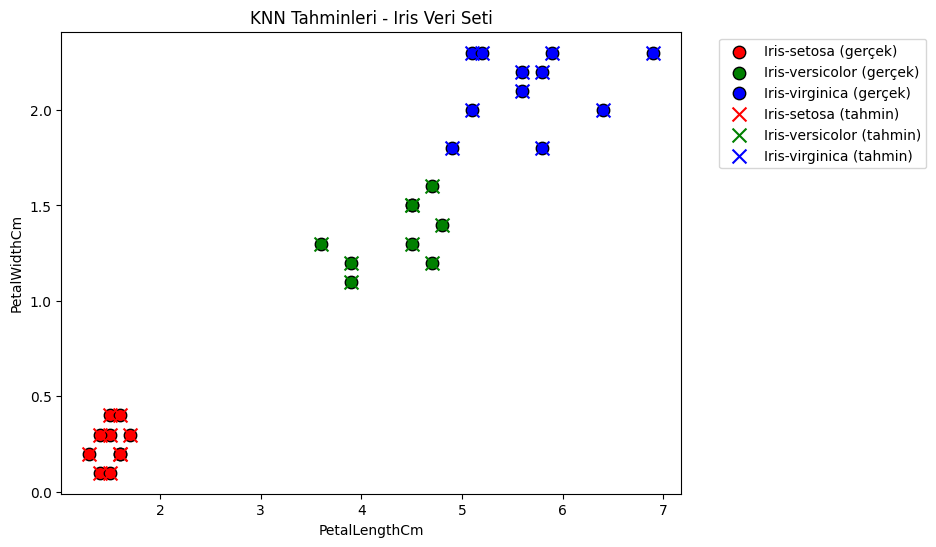

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Özellikleri seç: PetalLengthCm ve PetalWidthCm
X_plot = X[['PetalLengthCm', 'PetalWidthCm']].values
y_plot = y.values

# Eğitim ve test setlerini ayır
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
    X_plot, y_plot, test_size=0.2, random_state=42
)

# Modeli oluştur ve eğit
model_plot = KNeighborsClassifier(n_neighbors=3)
model_plot.fit(X_train_plot, y_train_plot)

# Test seti tahminleri
y_pred_plot = model_plot.predict(X_test_plot)

# Plot için renkler
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

# Test verisini ve tahminleri göster
plt.figure(figsize=(8,6))

# Gerçek türler (dairesel işaret)
for species in np.unique(y_test_plot):
    idx = np.where(y_test_plot == species)
    plt.scatter(X_test_plot[idx, 0], X_test_plot[idx, 1],
                c=colors[species], label=f"{species} (gerçek)",
                marker='o', edgecolor='k', s=80)

# Tahminler (çarpı işaret)
for species in np.unique(y_pred_plot):
    idx = np.where(y_pred_plot == species)
    plt.scatter(X_test_plot[idx, 0], X_test_plot[idx, 1],
                c=colors[species], label=f"{species} (tahmin)",
                marker='x', s=100)

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('KNN Tahminleri - Iris Veri Seti')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


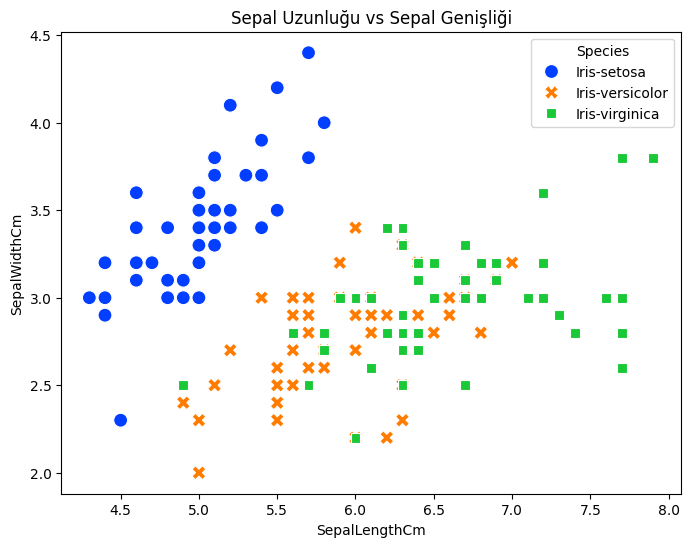

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', s=100, palette="bright")
plt.title("Sepal Uzunluğu vs Sepal Genişliği")
plt.show()


/tmp/ipython-input-129280358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='PetalLengthCm', data=df, palette="pastel")


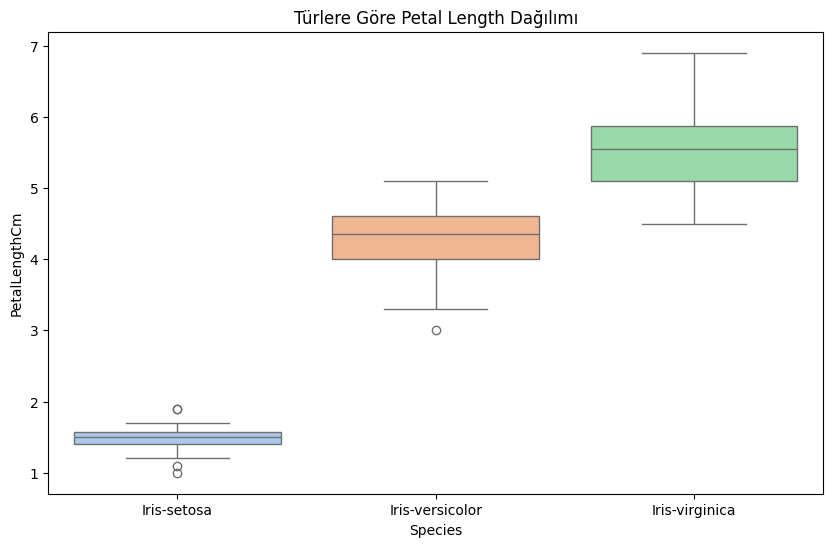

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Species', y='PetalLengthCm', data=df, palette="pastel")
plt.title("Türlere Göre Petal Length Dağılımı")
plt.show()


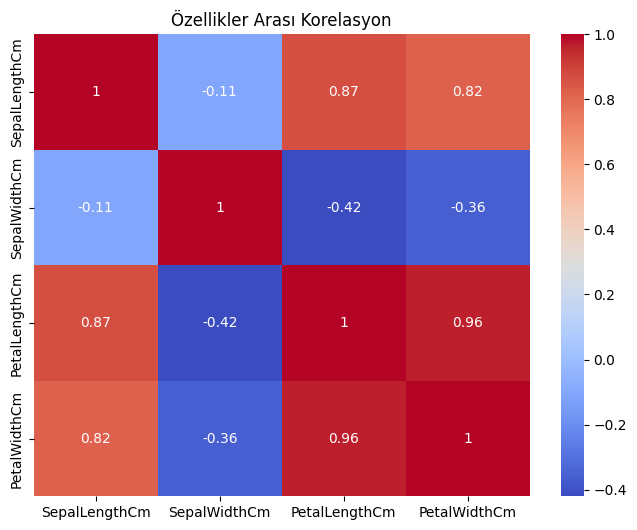

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunları seç
numeric_df = df.drop(['Id'], axis=1).select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Özellikler Arası Korelasyon")
plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder oluştur
le = LabelEncoder()

# Species sütununu sayısala çevir ve yeni sütun oluştur
df['Species_num'] = le.fit_transform(df['Species'])

# Kontrol
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_num  
0            0  
1            0  
2            0  
3            0  
4            0  


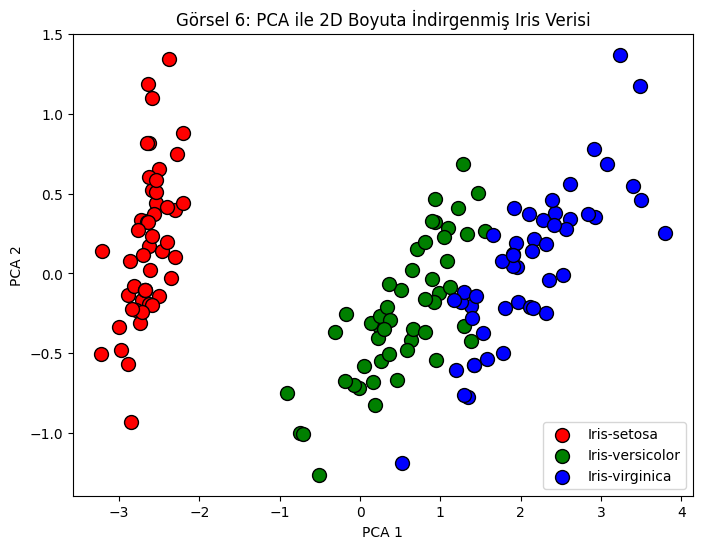

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2D Scatter Plot
plt.figure(figsize=(8,6))
for species, color in zip(df['Species'].unique(), ['red', 'green', 'blue']):
    idx = df['Species'] == species
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=color, label=species, s=100, edgecolor='k')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Görsel 6: PCA ile 2D Boyuta İndirgenmiş Iris Verisi")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
X_nn = df.drop(['Id','Species','Species_num'], axis=1).values
y_nn = to_categorical(df['Species_num'].values)


In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42
)


In [ ]:
model_nn = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_nn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model_nn.fit(
    X_train_nn, y_train_nn,
    epochs=50,
    batch_size=16,
    validation_split=0.1
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4682 - loss: 1.3072 - val_accuracy: 0.5833 - val_loss: 1.4303
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6057 - loss: 1.3763 - val_accuracy: 0.5833 - val_loss: 1.3379
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6469 - loss: 1.2774 - val_accuracy: 0.5833 - val_loss: 1.2587
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6724 - loss: 1.1961 - val_accuracy: 0.5833 - val_loss: 1.1862
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6409 - loss: 1.1588 - val_accuracy: 0.5833 - val_loss: 1.1234
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6561 - loss: 1.1016 - val_accuracy: 0.5833 - val_loss: 1.0760
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6874 - loss: 1.0513 - val_accuracy: 0.5833 - val_loss: 1.0420
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7077 - loss: 1.0252 - val_accuracy: 0.5833 - val_loss: 1.0204


In [ ]:
loss, acc = model_nn.evaluate(X_test_nn, y_test_nn)
print(f"Neural Network Test Doğruluk: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9667 - loss: 0.2880
Neural Network Test Doğruluk: 96.67%


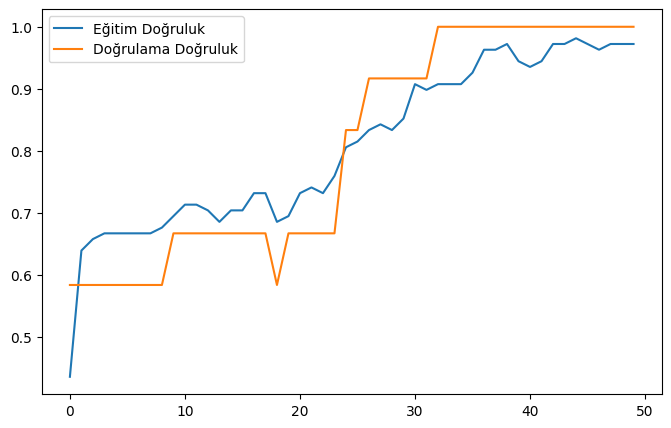

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluk')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluk')
plt.legend()
plt.show()


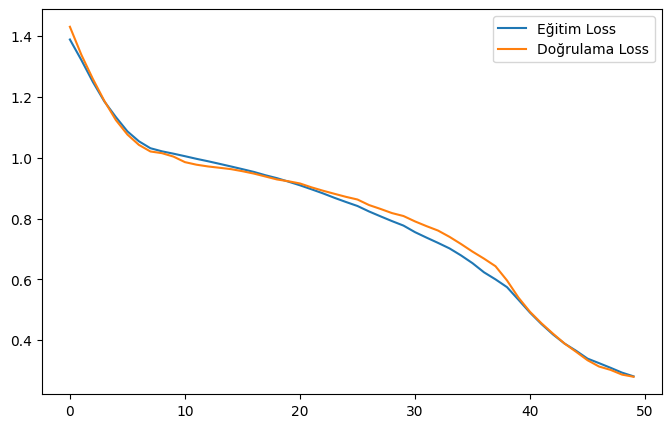

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Eğitim Loss')
plt.plot(history.history['val_loss'], label='Doğrulama Loss')
plt.legend()
plt.show()


In [ ]:
y_pred_nn = model_nn.predict(X_test_nn)
y_pred_classes = np.argmax(y_pred_nn, axis=1)
y_true_classes = np.argmax(y_test_nn, axis=1)

cm_nn = confusion_matrix(y_true_classes, y_pred_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


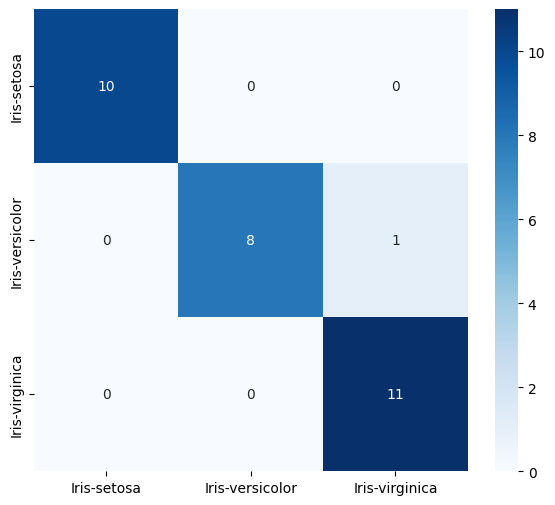

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.show()
